In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# read excel file
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='phosphor_model')
df = df[list(df.columns)[1:-6] + ['cd/A']]
print(df.shape)
df.head()

(128, 32)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL,cd/A
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0,5.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0,4.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0,9.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0,12.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0,8.0


In [3]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0]

#drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(125, 32)


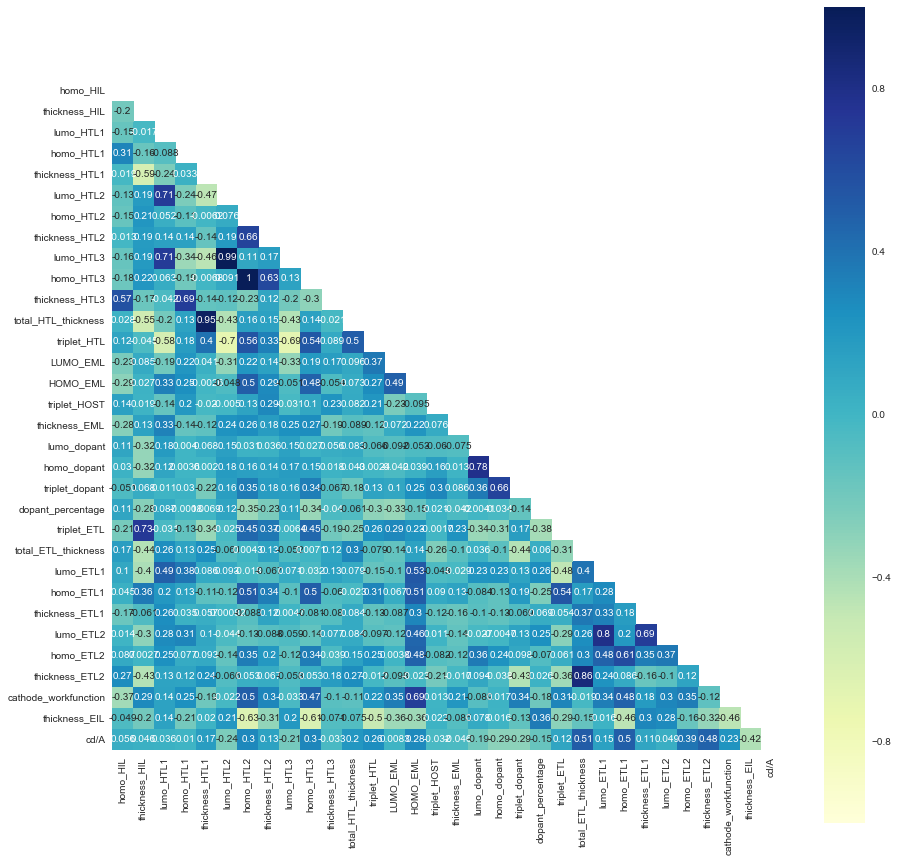

List the features in descending order of their correlation with cd/A:

total_ETL_thickness:   0.5104863550319568
homo_ETL1:   0.4956072713290662
thickness_ETL2:   0.480492943324059
thickness_EIL:   -0.41604998395062237
homo_ETL2:   0.38605769248151495
homo_HTL3:   0.30410941709509925
homo_HTL2:   0.2951177523283638
triplet_dopant:   -0.292339192841687
homo_dopant:   -0.29214628264251347
HOMO_EML:   0.2844852739963646
triplet_HTL:   0.26452021632114175
lumo_HTL2:   -0.2417010273630296
cathode_workfunction:   0.2307083520689319
lumo_HTL3:   -0.20967189537770684
total_HTL_thickness:   0.20449138058163643
lumo_dopant:   -0.19351232849766412
thickness_HTL1:   0.1687814198576772
dopant_percentage:   -0.1495892883122979
lumo_ETL1:   0.1453679125676742
thickness_HTL2:   0.13349302182715242
triplet_ETL:   0.1161846262244359
thickness_ETL1:   0.11349832253804763
homo_HIL:   0.056441131631065
lumo_ETL2:   0.04934555395434239
thickness_EML:   -0.04637722717905551
thickness_HIL:   0.045937536719317

In [4]:
X = df[list(df.columns)[:]]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

In [5]:
X = df.iloc[:, :-1]
y = df[['cd/A']]
print(X.shape)
X.head()

(125, 31)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_EIL
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35,2.8,6.2,0.0,2.8,6.2,35,2.8,10.0


In [6]:
y.head()

,cd/A
0,5.0
1,4.0
2,9.0
3,12.0
4,8.0


In [135]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=67)

## Feature Selection

Here we are trying to figure out which feature affect the efficiency the most. Since the data that we have are limited, complex model with many features are not going to give us the best result. Hence we reduce the number of feature thus minimizing the complexity of the model. One way to do this is by using the result from correaltion heatmap above. Another ways is using SelectKBest features in scikit learn and setting f regression and mututal info regression as metrics. 

In [116]:
from sklearn.feature_selection import SelectKBest, f_regression

# find best 10 features using f_regression
select_feature = SelectKBest(f_regression, k=10).fit(X_train, y_train.values.ravel())

scores = select_feature.scores_
names = X_train.columns
scores,names  = zip(*sorted(zip(scores, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'names', 'scores'))
for i, (name, score) in enumerate(zip(names, scores)):
    print(fmt.format(i, name, score))

        names               scores
0       total_ETL_thickness 35.986119047579514
1       thickness_ETL2      32.56927807949096
2       homo_ETL1           30.460982086894052
3       thickness_EIL       20.656902043219464
4       homo_ETL2           12.543404905961198
5       triplet_dopant      12.208558061537206
6       homo_dopant         12.124863788356688
7       homo_HTL3           11.229392448755128
8       homo_HTL2           10.370667050936285
9       triplet_HTL         7.127938978665875
10      total_HTL_thickness 6.448388475189061
11      HOMO_EML            6.141749337312362
12      lumo_dopant         5.002080936142549
13      thickness_HTL1      4.892275497573361
14      lumo_HTL2           4.2750973880193435
15      cathode_workfunction3.2987511221218346
16      lumo_HTL3           2.8159864012010027
17      dopant_percentage   2.1561667533488125
18      lumo_ETL1           1.1842899311018666
19      thickness_HTL2      1.1539688085147362
20      triplet_ETL         1.0

In [76]:
from sklearn.feature_selection import mutual_info_regression

# find best scored features using mutual_info_regression
select_feature = SelectKBest(mutual_info_regression, k=10).fit(X_train, y_train.values.ravel())

scores = select_feature.scores_
names = X_train.columns
scores,names  = zip(*sorted(zip(scores, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'scores', 'names'))
for i, (name, score) in enumerate(zip(names, scores)):
    print(fmt.format(i, name, score))

        scores              names
0       triplet_ETL         0.3166405939926189
1       homo_ETL2           0.2511271947368363
2       lumo_ETL1           0.22214831671132895
3       homo_ETL1           0.21723856387790175
4       LUMO_EML            0.2167290434444209
5       lumo_ETL2           0.20631039826302677
6       total_ETL_thickness 0.19524181135734153
7       thickness_EIL       0.1836342392891981
8       homo_HTL3           0.16284780654971653
9       triplet_dopant      0.16201311605307378
10      homo_HTL2           0.16133616518930838
11      thickness_ETL2      0.15473907030065925
12      homo_dopant         0.1259931669790375
13      triplet_HOST        0.12122610073021045
14      thickness_HTL1      0.12077989474444628
15      total_HTL_thickness 0.1170570146778056
16      lumo_HTL2           0.11183708648538193
17      thickness_HIL       0.10034955252742517
18      lumo_dopant         0.09999550927441891
19      HOMO_EML            0.09908996083612509
20      lumo

In [41]:
print(names)

('triplet_ETL', 'lumo_ETL2', 'triplet_dopant', 'homo_ETL2', 'lumo_ETL1', 'homo_HTL2', 'homo_HTL3', 'homo_dopant', 'homo_ETL1', 'lumo_dopant', 'thickness_HIL', 'thickness_ETL2', 'thickness_HTL1', 'total_ETL_thickness', 'triplet_HTL', 'thickness_EIL', 'thickness_EML', 'lumo_HTL3', 'lumo_HTL2', 'lumo_HTL1', 'total_HTL_thickness', 'LUMO_EML', 'thickness_HTL2', 'homo_HTL1', 'thickness_ETL1', 'dopant_percentage', 'triplet_HOST', 'cathode_workfunction', 'thickness_HTL3', 'homo_HIL', 'HOMO_EML')


In [117]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

R-squared:  0.731658236772
MS Error:  78.2584486418


In [118]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=8, shuffle=True, random_state=93)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [ 0.61824966  0.73762447  0.75537149 -1.03833699  0.37213597  0.64200025
  0.21473445  0.5128535 ]
mean score:  0.351829100183


        column              importance
0       triplet_ETL         0.18215577279424133
1       thickness_EIL       0.17865509525373005
2       triplet_HOST        0.08762928368065578
3       total_ETL_thickness 0.0839024685861639
4       HOMO_EML            0.06422631407633628
5       lumo_ETL1           0.05233625733795565
6       LUMO_EML            0.04408546031607781
7       thickness_EML       0.03184229329257608
8       lumo_ETL2           0.029494372904494942
9       thickness_ETL2      0.02572014572850153
10      thickness_HTL1      0.025608458006136897
11      homo_HTL3           0.02454565828722239
12      triplet_dopant      0.020899505010349366
13      homo_dopant         0.019154758851233224
14      total_HTL_thickness 0.016032471057110958
15      dopant_percentage   0.01585176088501689
16      homo_HIL            0.013892046373757771
17      lumo_dopant         0.01307125077540478
18      thickness_HIL       0.013044478648136792
19      homo_HTL2           0.0111227547804

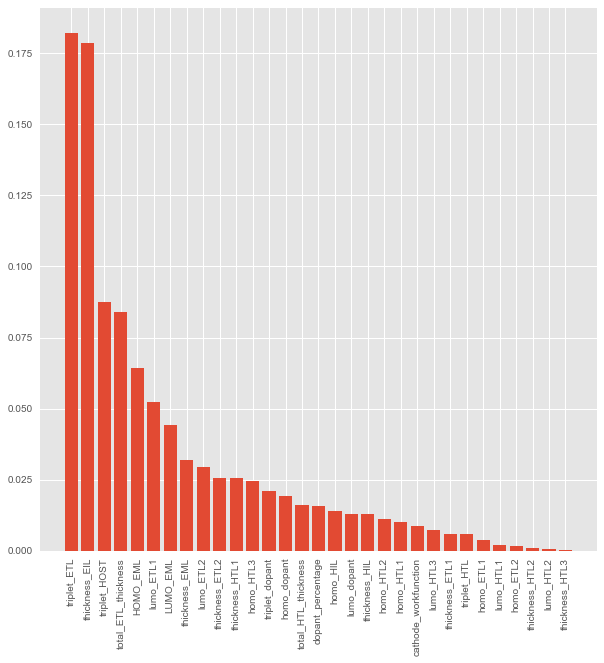

In [112]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

x = np.arange(31)
plt.bar(x, importance)
plt.xticks(x, names, rotation=90);

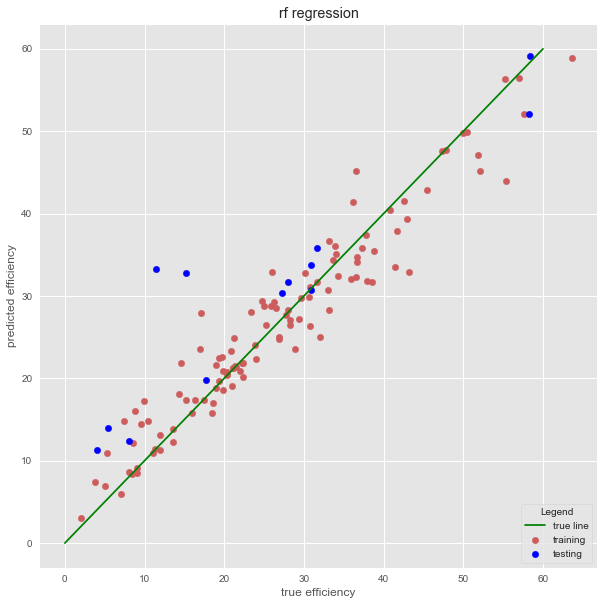

In [119]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(y_train, pred_train, c='indianred', s=40, label='training')
plt.scatter(y_test, y_predictions, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend');
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' rf regression ')
plt.show()

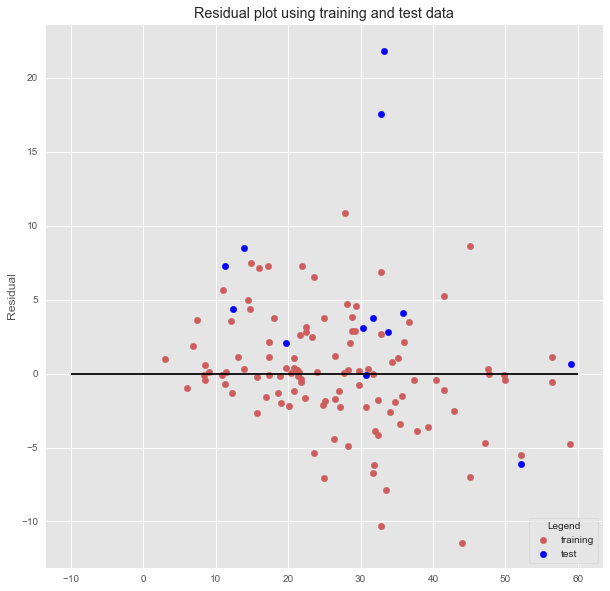

In [120]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)),
            c='indianred', s=40, label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), 
            c='b', s=40, label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

In [121]:
from xgboost import XGBRegressor, plot_importance
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Choose regression algorithm
regressor = XGBRegressor()

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores = cross_val_score(regressor, X, y, cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.728999517253
MS Error:  79.0338302389
scores:  [ 0.69168015  0.77921998  0.77454665 -0.65437343  0.42844597  0.55121282
  0.31010743  0.69768554]
mean score:  0.447315638186


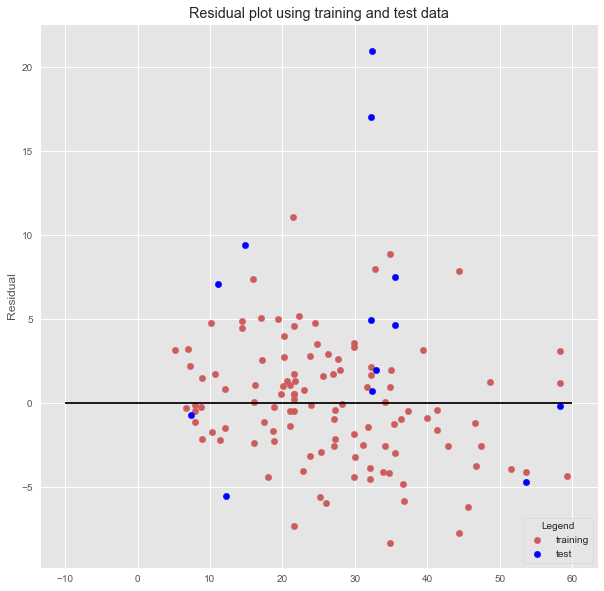

In [122]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

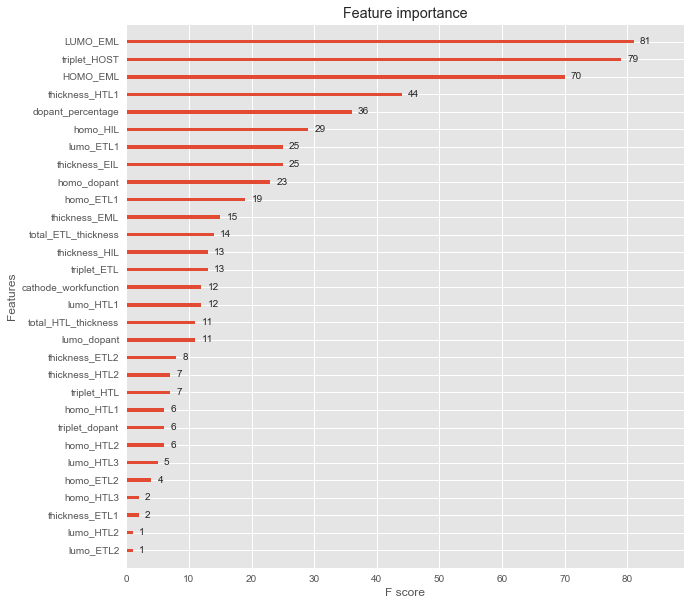

In [83]:
plot_importance(regressor);

In [143]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(random_state = 2, n_estimators=250, loss='square')
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMS Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.551463909178
MS Error:  93.7461397432
RMS Error:  9.68225902066
scores:  [ 0.64624022  0.7885127   0.77621814 -0.48316504  0.42661982  0.23709328
  0.08337783  0.54735261]
mean score:  0.377781194547


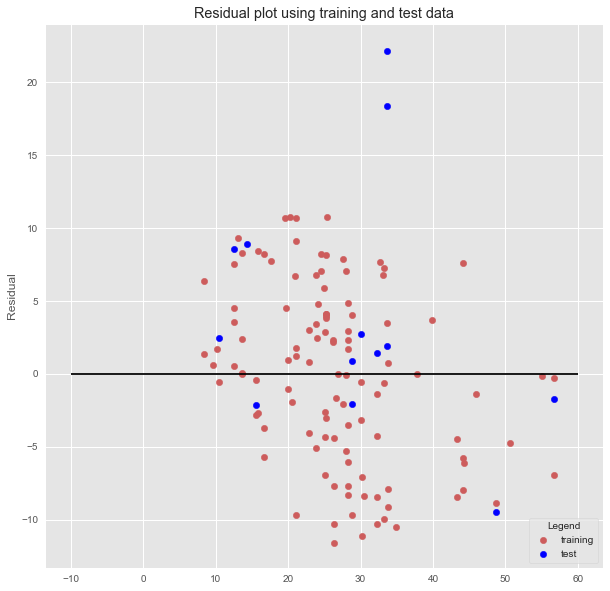

In [124]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

        column              importance
0       total_HTL_thickness 0.11449249702144343
1       thickness_HIL       0.09684862289404036
2       total_ETL_thickness 0.09244173377193361
3       triplet_HOST        0.09172808817999685
4       triplet_ETL         0.07859507773900463
5       thickness_EIL       0.07563779119721382
6       thickness_HTL1      0.06327560750846073
7       dopant_percentage   0.04795642235371582
8       homo_HIL            0.04658307900285029
9       LUMO_EML            0.03332811589546805
10      triplet_HTL         0.027502714628743343
11      HOMO_EML            0.026150448315770437
12      thickness_EML       0.022904609494614196
13      thickness_ETL2      0.019595140445946915
14      lumo_HTL2           0.015337924522861042
15      lumo_ETL2           0.015112527440546775
16      homo_HTL2           0.013989021713454234
17      homo_ETL1           0.013685188992311454
18      homo_ETL2           0.012845859703539414
19      thickness_HTL2      0.0110459103

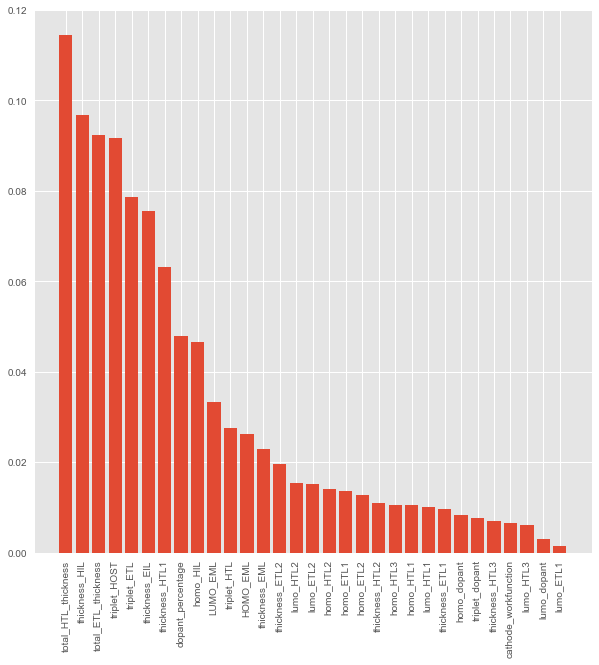

In [125]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

x = np.arange(31)
plt.bar(x, importance)
plt.xticks(x, names, rotation=90);

In [24]:
# from tpot import TPOTRegressor

# tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_pholed.py')

In [105]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=8,
                                                    min_samples_split=5, n_estimators=100)),
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=1,
                                                      min_samples_split=18, n_estimators=100)),
    RandomForestRegressor(bootstrap=True, max_features=0.1, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train.values.ravel())
y_pred = exported_pipeline.predict(X_test)

print('R-squared: ', exported_pipeline.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_pred))
print('RMS Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

scores = cross_val_score(exported_pipeline, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.507678927877
MS Error:  119.539002748
RMS Error:  10.9333893532
scores:  [ 0.66661834  0.75841071  0.57263562 -0.22621102  0.50722945  0.59572274
  0.26909592  0.60815383]
mean score:  0.468956948437


In [106]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(random_state = 1)

regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMS Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.401856291629
MS Error:  145.233479628
RMS Error:  12.0512853932
scores:  [ 0.72417071  0.77873825  0.81431662 -0.66684279  0.40184766  0.52960484
  0.29367283  0.64864208]
mean score:  0.440518774888


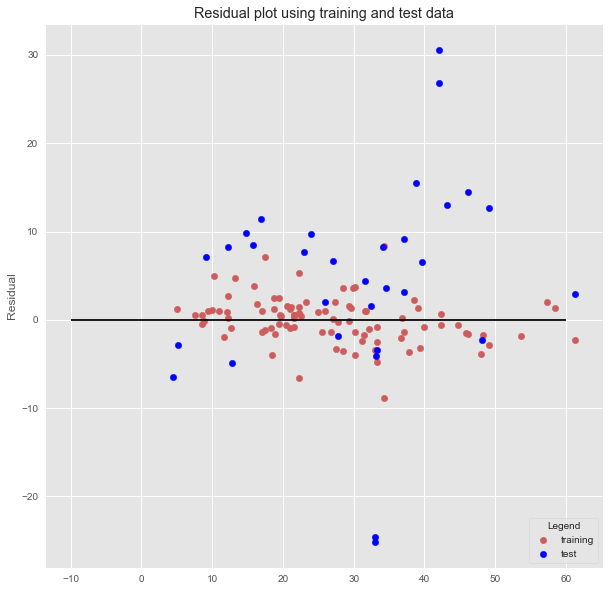

In [107]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

In [71]:
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = MLPRegressor(random_state=12, hidden_layer_sizes=(18, 6), activation='relu', solver='adam', max_iter=100000)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test_scaled)

scores = cross_val_score(regressor, X_train_scaled, y_train.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

# Check how our model is doing
print('R-squared: ', regressor.score(X_test_scaled, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores:  [ 0.31939458  0.82610329  0.56900057  0.55354576  0.89473422 -1.78848956
  0.64476179  0.47266346]
mean score:  0.311464264469
R-squared:  -5.78751670017
MS Error:  823.270729462


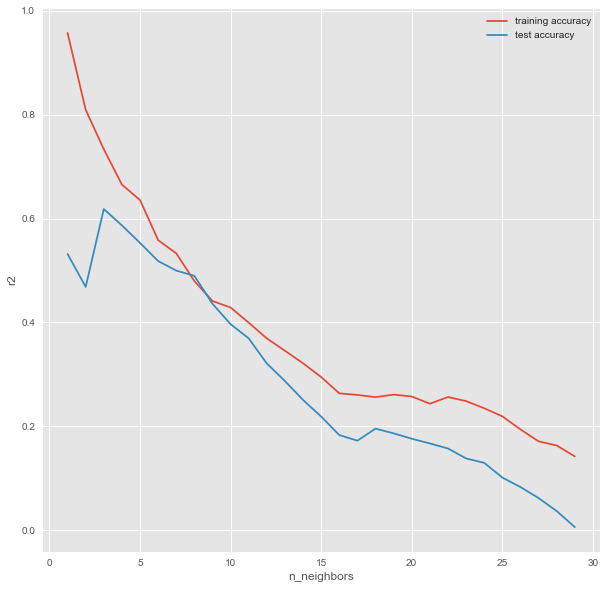

In [91]:
from sklearn.neighbors import KNeighborsRegressor
training_coefficient = []
test_coefficient = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_coefficient.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_coefficient.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_coefficient, label="training accuracy")
plt.plot(neighbors_settings, test_coefficient, label="test accuracy")
plt.ylabel("r2")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [108]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# cross val score
scores = cross_val_score(regressor, X_train, y_train.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores:  [ 0.50259476  0.43232621  0.52430271  0.26254083  0.08684558 -0.51019055
 -0.51926337 -0.02300142]
mean score:  0.0945193448765
R-squared:  0.483378616213
MS Error:  125.439288532


In [93]:
X_1 = df[['homo_HIL'] + ['homo_HTL1'] +['homo_HTL2']+ ['homo_HTL3'] +['HOMO_EML'] + ['homo_dopant'] + ['total_HTL_thickness']
       + ['LUMO_EML'] + ['lumo_ETL1'] + ['lumo_ETL2'] +['lumo_dopant'] + ['total_ETL_thickness'] + ['cathode_workfunction'] + 
       ['triplet_dopant'] + ['thickness_EML'] + ['triplet_HOST'] + ['triplet_ETL'] + ['triplet_HTL']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y,test_size=0.25, random_state=7)

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train_1, y_train_1.values.ravel())
y_predictions_1 = regressor.predict(X_test_1)

# cross val score
scores = cross_val_score(regressor, X_train_1, y_train_1.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

# Check how our model is doing
print('R-squared: ', regressor.score(X_test_1, y_test_1))
print('MS Error: ', mean_squared_error(y_test_1, y_predictions_1))

scores:  [ 0.15539546  0.30615954  0.45077447  0.72232507  0.01424889  0.35294359
  0.31347399 -0.08543233]
mean score:  0.278736085498
R-squared:  0.515417681917
MS Error:  107.296852491


In [138]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score

estimator = list(np.arange(10, 400, 10))
parameters = {
                'n_estimators': estimator,
                'loss': ('linear', 'square', 'exponential')
             }
regressor = AdaBoostRegressor(random_state=2)
reg = GridSearchCV(regressor, parameters, verbose=3, scoring='r2', cv=kfold, n_jobs=-1)

reg.fit(X_train, y_train.values.ravel())
print('Best score: %0.3f' % reg.best_score_)
print('Best parameters set:')
best_parameters = reg.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    
y_predictions = reg.predict(X_test)
print('r2 on test set:', r2_score(y_test, y_predictions))

# scores = cross_val_score(reg, X, y.values.ravel(), cv=kfold)
# print('scores: ', scores)
# print('mean score: ', scores.mean())

Fitting 8 folds for each of 117 candidates, totalling 936 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 936 out of 936 | elapsed:  2.5min finished


Best score: 0.634
Best parameters set:
	loss: 'square'
	n_estimators: 250
r2 on test set: 0.551463909178


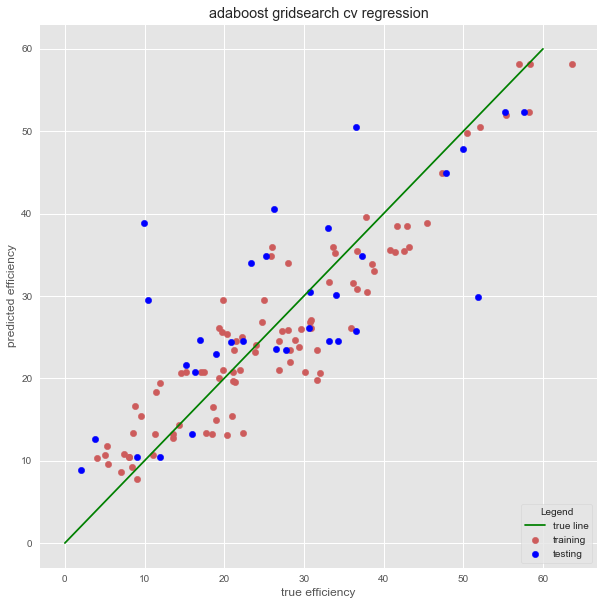

In [139]:
pred_train = reg.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(y_train, pred_train, c='indianred', s=40, label='training')
plt.scatter(y_test, y_predictions, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend');
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' adaboost gridsearch cv regression ')
plt.show()